<a href="https://colab.research.google.com/github/PrakashRanjanShrivastava/Mulitple_linear_regerssion/blob/main/MY_Fish_MLR_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import io
import seaborn as sns

Reading Data

In [2]:
from google.colab import files
Data_to_load = files.upload()

Saving Fish.csv to Fish.csv


In [3]:
fish_df= pd.read_csv(io.BytesIO(Data_to_load['Fish.csv']))

In [4]:
fish_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
fish_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
fish_df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Checking the distribution of variables .

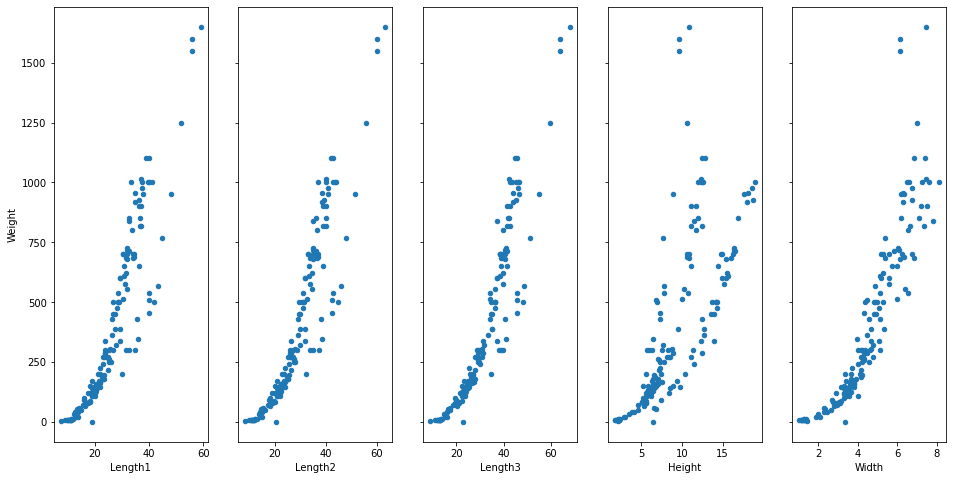

In [8]:
fig,axs = plt.subplots(1,5,sharey = True)
fish_df.plot(kind = 'scatter',x = 'Length1',y='Weight',ax=axs[0],figsize = (16,8))
fish_df.plot(kind = 'scatter', x= 'Length2',y ='Weight', ax=axs[1])
fish_df.plot(kind= 'scatter', x= 'Length3', y = 'Weight',ax =axs[2])
fish_df.plot(kind = 'scatter', x = 'Height', y = 'Weight',ax =axs[3])
fish_df.plot(kind ='scatter',x='Width', y = 'Weight',ax =axs[4])

In [9]:
fish = fish_df[['Weight','Length1','Length2','Length3','Height','Width']]

Building the Intial Model

In [10]:
model = smf.ols('Weight~Length1+Length2+Length3+Height+Width',data=fish).fit()

In [11]:
#Coefficients
model.params

Intercept   -499.586955
Length1       62.355214
Length2       -6.526752
Length3      -29.026219
Height        28.297351
Width         22.473307
dtype: float64

In [12]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept   -16.893781
Length1       1.550788
Length2      -0.156297
Length3      -1.672696
Height        3.241679
Width         1.103161
dtype: float64 
 Intercept    8.441362e-37
Length1      1.230186e-01
Length2      8.760053e-01
Length3      9.643079e-02
Height       1.458477e-03
Width        2.716892e-01
dtype: float64


In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8852867046546207, 0.8815379041531377)

Checking the Correaltion

In [14]:
fish.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


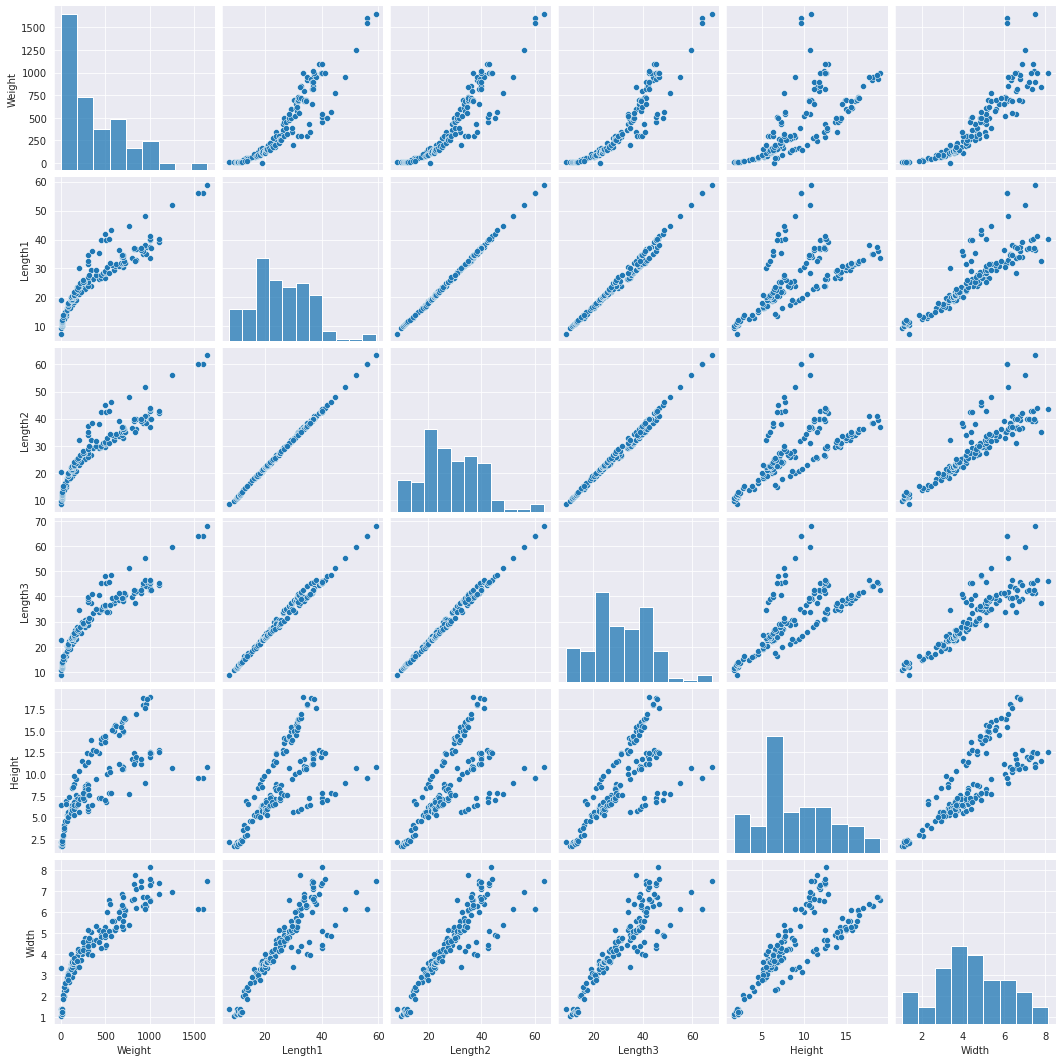

In [15]:
sns.set_style(style='darkgrid')
sns.pairplot(fish)

Variance Influence Factor(VIF_Score)

In [16]:
rsq_wg= smf.ols('Weight~Length1+Length2+Length3+Height+Width',data=fish).fit().rsquared
vif_wg = 1/(1-rsq_wg)

rsq_l1 = smf.ols('Length1~Weight+Length2+Length3+Height+Width',data=fish).fit().rsquared  
vif_l1= 1/(1-rsq_l1) 

rsq_l2= smf.ols('Length2~Weight+Length1+Length3+Height+Width',data=fish).fit().rsquared  
vif_l2 = 1/(1-rsq_l2) 

rsq_l3 = smf.ols('Length3~Weight+Length1+Length2+Height+Width',data=fish).fit().rsquared  
vif_l3= 1/(1-rsq_l3) 

rsq_ht= smf.ols('Height~Weight+Length1+Length2+Length3+Width',data=fish).fit().rsquared
vif_ht= 1/(1-rsq_ht)

rsq_wd = smf.ols('Width~Weight+Length1+Length2+Length3+Height',data=fish).fit().rsquared  
vif_wd = 1/(1-rsq_wd) 

# Storing vif values in a data frame
d1 = {'Variables':['Weight','Length1','Length2','Length3','Height','Width'],'VIF':[vif_wg,vif_l1,vif_l2,vif_l3,vif_ht,vif_wd]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Weight,8.717385
1,Length1,1707.927219
2,Length2,2084.590610
3,Length3,430.193929
4,Height,15.570803
5,Width,12.372999


Checking R_Squared and AIC for differnt combinations of Variables in different Models

In [17]:
import statsmodels.formula.api as smf

In [18]:
mdl1 = smf.ols('Weight~Length2+Length3+Height+Width',data = fish).fit()
f'AIC: {mdl1.aic}, rs_l1:{rsq_l1}'

'AIC: 1988.4035625880533, rs_l1:0.9994144949568317'

In [19]:
mdl2 = smf.ols('Weight~Length1+Length3+Height+Width',data = fish).fit()
f'AIC: {mdl2.aic}, rs_l1:{rsq_l2}'

'AIC: 1985.949132369944, rs_l1:0.9995202895017897'

 Checking Normality 

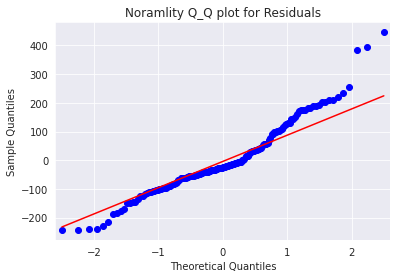

In [20]:
import statsmodels.api as sm
mdl2 = smf.ols('Weight~Length1+Length3+Height+Width',data = fish).fit()
qqplot = sm.qqplot(mdl2.resid, line = 'q')
plt.title('Noramlity Q_Q plot for Residuals')
plt.show()

Checking for Homoscedasticity

In [21]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

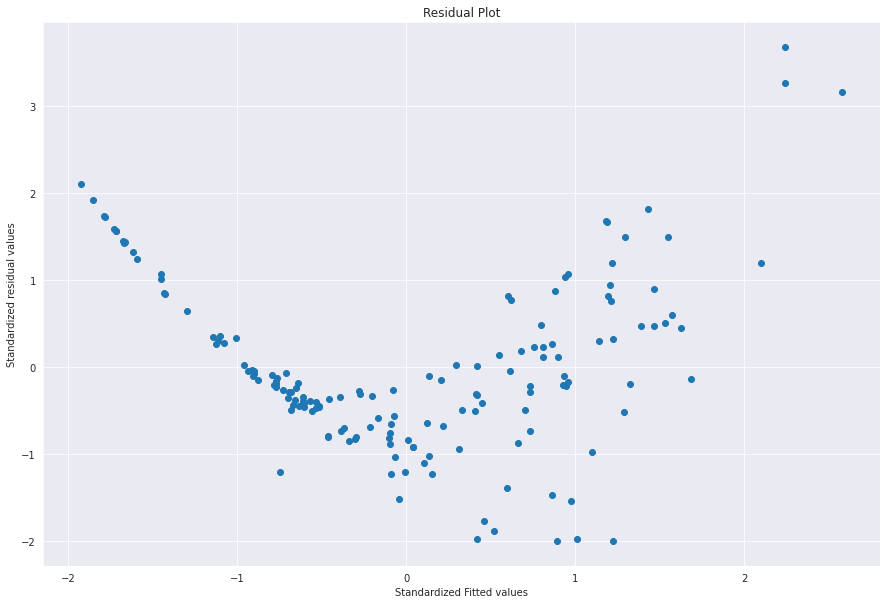

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(mdl2.fittedvalues),
            get_standardized_values(mdl2.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

** Residual Vs Regressors**

In [23]:
mdl2 = smf.ols('Weight~Length1+Length3+Height+Width',data = fish).fit()

In [24]:
f'AIC:{mdl2.aic}'

'AIC:1985.949132369944'

In [25]:
(mdl2.rsquared,mdl2.rsquared_adj)

(0.8852683890437999, 0.8822883472007818)

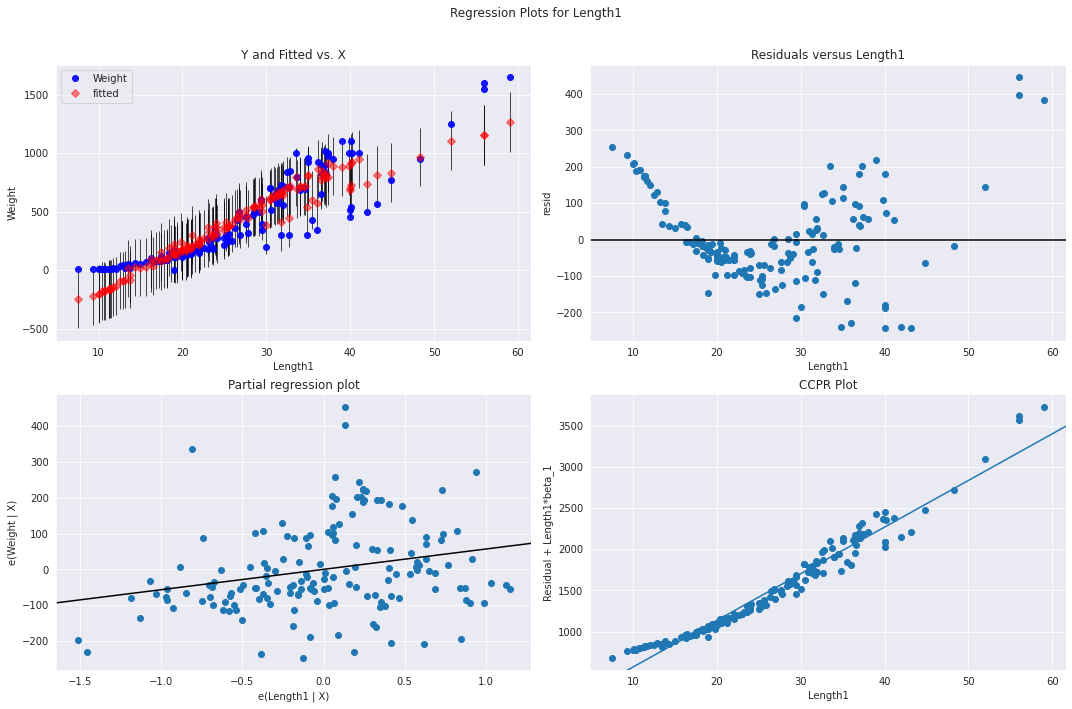

In [26]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(mdl2,"Length1", fig=fig)
plt.show()

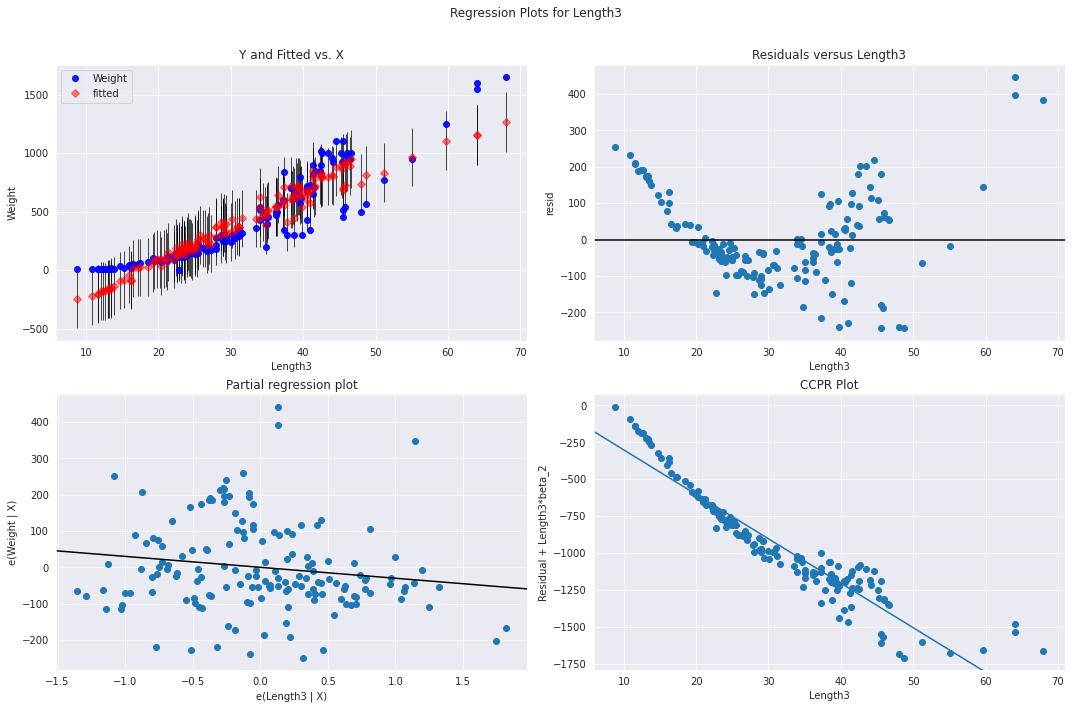

In [27]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(mdl2, "Length3", fig=fig)
plt.show()

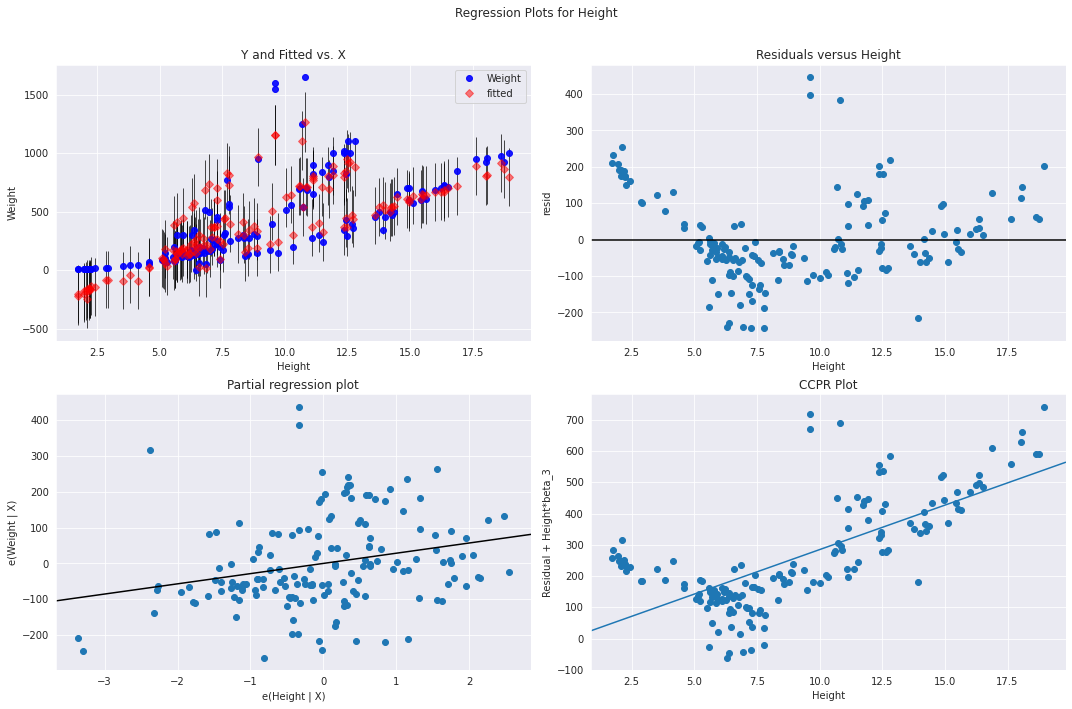

In [28]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(mdl2, "Height", fig=fig)
plt.show()

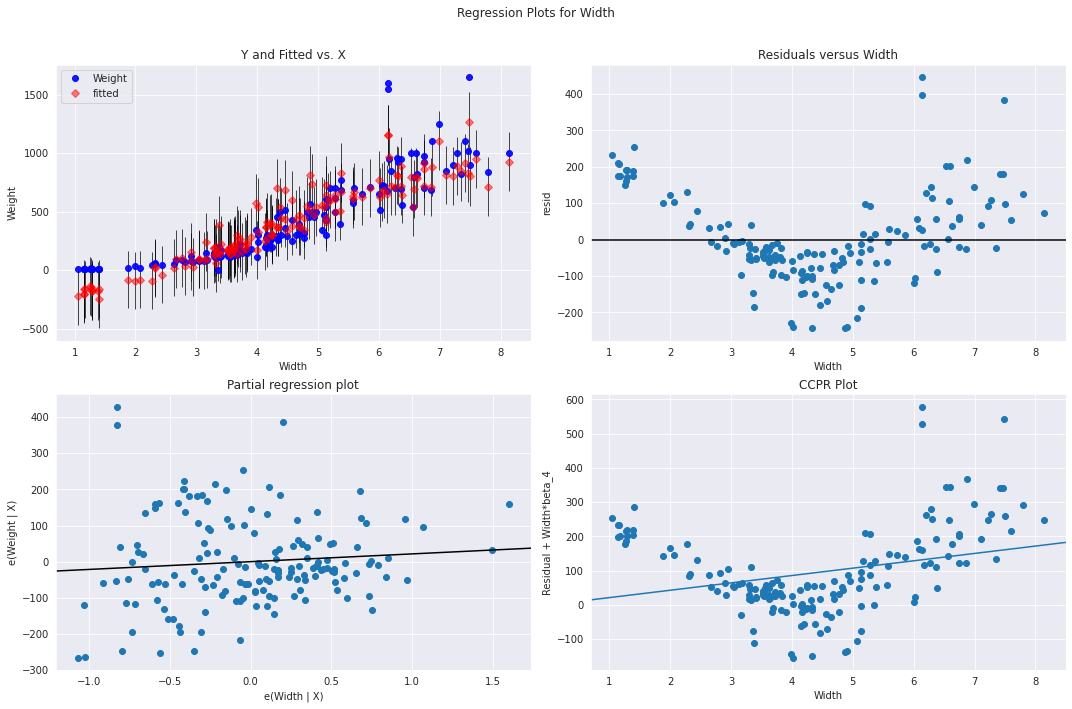

In [29]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(mdl2, "Width", fig=fig)
plt.show()

In [30]:
mdl3 = smf.ols('Weight~Length3+Height+Width',data = fish).fit()

In [31]:
f'AIC:{mdl3.aic}'

'AIC:1993.9231387106206'

In [32]:
print(mdl3.tvalues, '\n', mdl3.pvalues)

Intercept   -17.762556
Length3      10.728148
Height        1.001226
Width         4.315441
dtype: float64 
 Intercept    3.297909e-39
Length3      1.977242e-20
Height       3.182778e-01
Width        2.827496e-05
dtype: float64


In [33]:
(mdl3.rsquared,mdl3.rsquared_adj)

(0.8778407913853106, 0.8754764196056715)

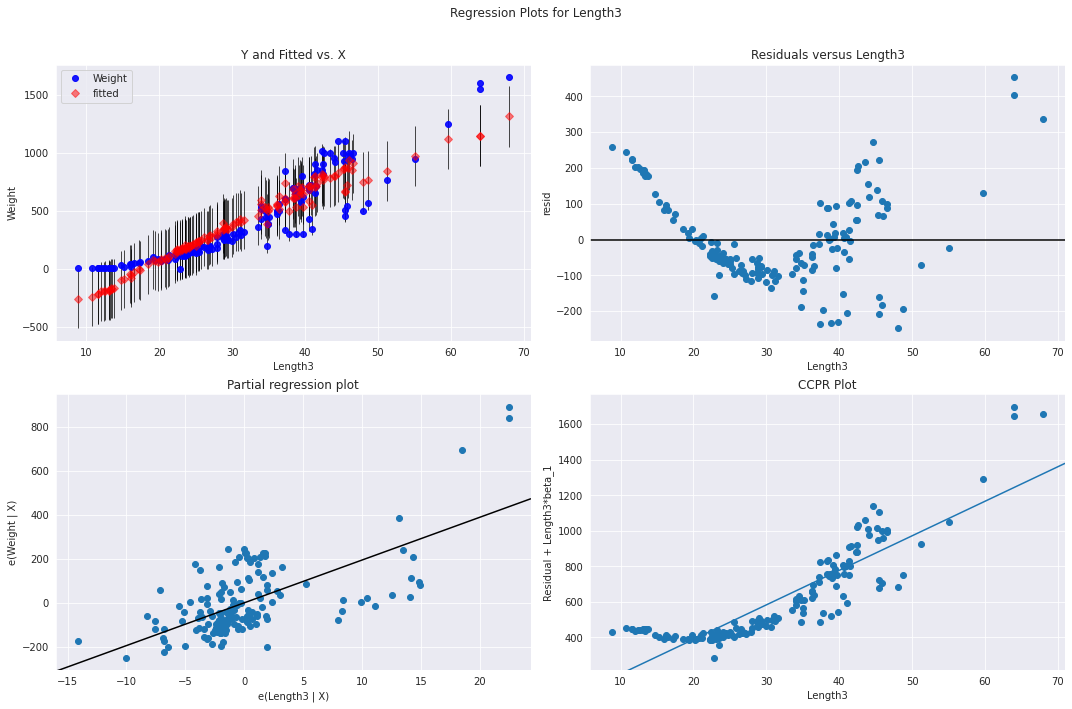

In [34]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(mdl3, "Length3", fig=fig)
plt.show()

In [35]:
mdl4 = smf.ols('Weight~Length1+Height+Width',data=fish).fit()

In [36]:
f'AIC:{mdl4.aic}'

'AIC:1987.6604964142593'

In [37]:
(mdl4.rsquared,mdl4.rsquared_adj)

(0.8825588337732083, 0.8802857789430123)

In [38]:
mdl5 = smf.ols('Weight~Height+Width',data=fish).fit()

In [39]:
f'AIC:{mdl5.aic}'

'AIC:2080.2224876082596'

In [40]:
(mdl5.rsquared,mdl5.rsquared_adj)

(0.7871331187690846, 0.7844040561892012)

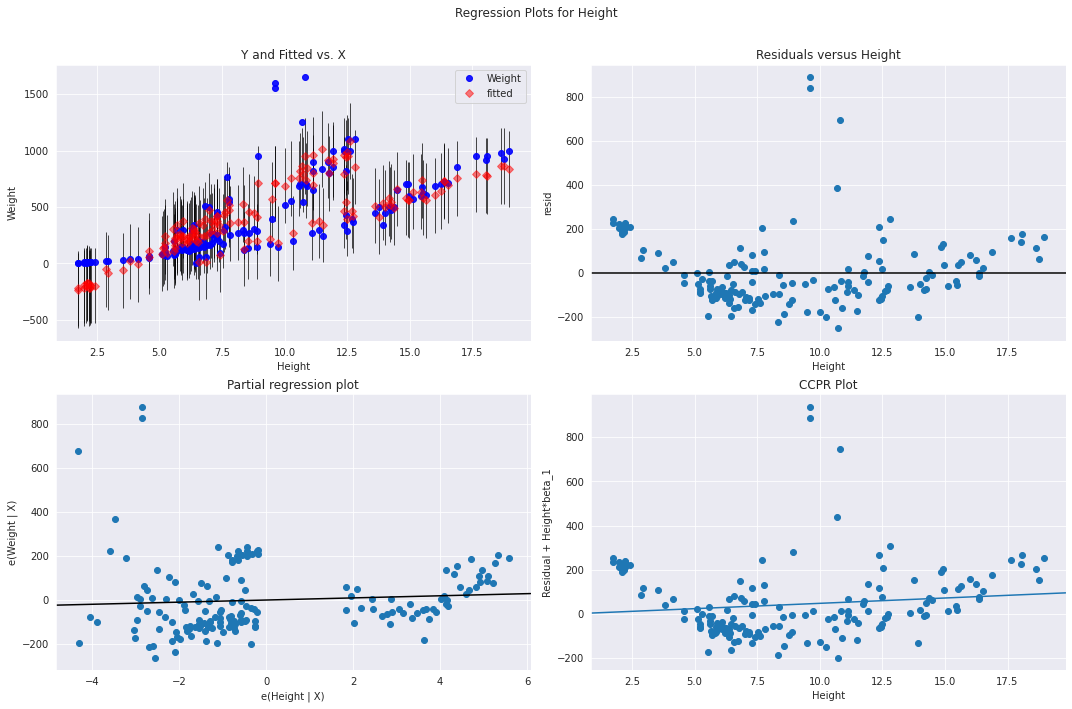

In [41]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(mdl5, "Height", fig=fig)
plt.show()

In [42]:
mdl6 = smf.ols('Weight~Length3+Height+Width',data=fish).fit()

In [43]:
f'AIC:{mdl6.aic}'

'AIC:1993.9231387106206'

In [44]:
(mdl6.rsquared,mdl6.rsquared_adj)

(0.8778407913853106, 0.8754764196056715)

Influence Plot considering mdl2

In [45]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = mdl2.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-46-3247865a4b4b>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(fish)), np.round(c, 3))


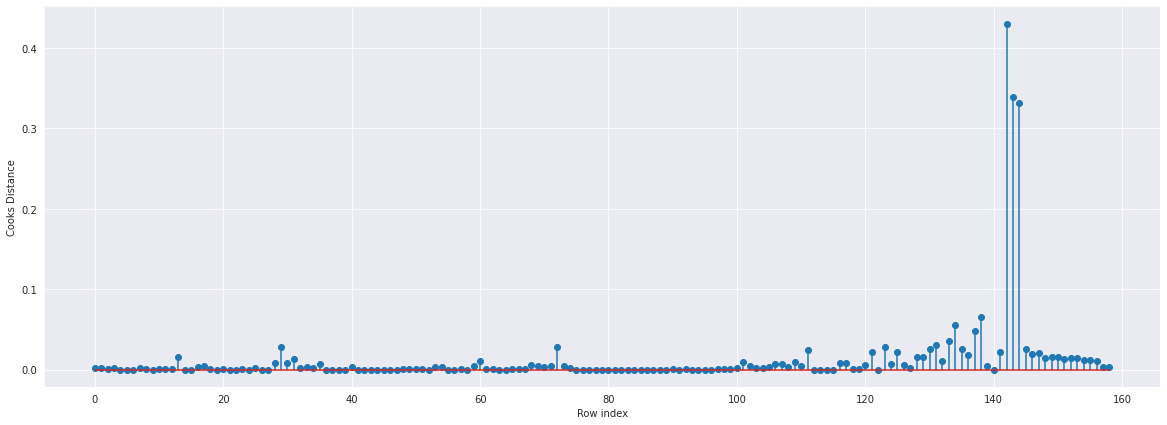

In [46]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(fish)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
(np.argmax(c),np.max(c))

(142, 0.42969558401210056)

In [48]:
k = fish.shape[1]
n = fish.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.1320754716981132

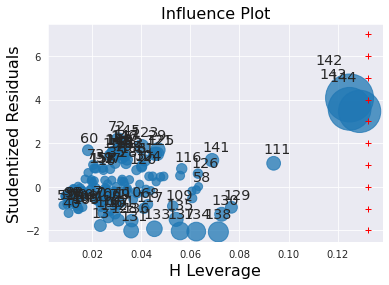

In [49]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(mdl2,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

From above graph it is evident that data point 142,143 and 144 are the influencer points

so, we have to drop the data points from the dataset

In [50]:
fish[fish.index.isin([142,143,144])]

,Weight,Length1,Length2,Length3,Height,Width
142,1600.0,56.0,60.0,64.0,9.600,6.144
143,1550.0,56.0,60.0,64.0,9.600,6.144
144,1650.0,59.0,63.4,68.0,10.812,7.480


Now, Impoving the model

In [51]:
#Read the data

import pandas as pd

from google.colab import files
uploaded = files.upload()



Saving Fish.csv to Fish (1).csv


In [52]:
fish_new = pd.read_csv("Fish.csv")
fish_new.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [53]:
#Discard the data points which are influencers and reasign the row number (reset_index())
fish1 = fish_new.drop(fish_new.index[[142,143,144]],axis = 0).reset_index()

In [54]:
fish1.isnull().sum()

index      0
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [55]:
fish1[fish1.index.isin([142,143,144])]

,index,Species,Weight,Length1,Length2,Length3,Height,Width
142,145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
143,146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
144,147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484


In [56]:
fish1 = fish1.drop(['index'],axis = 1)

In [57]:
fish1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [58]:
mdl02 = smf.ols('Weight~Length1+Length3+Height+Width',data = fish1).fit()

In [59]:
model_influence = mdl02.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-60-79459bff106d>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(fish1)), np.round(c, 3))


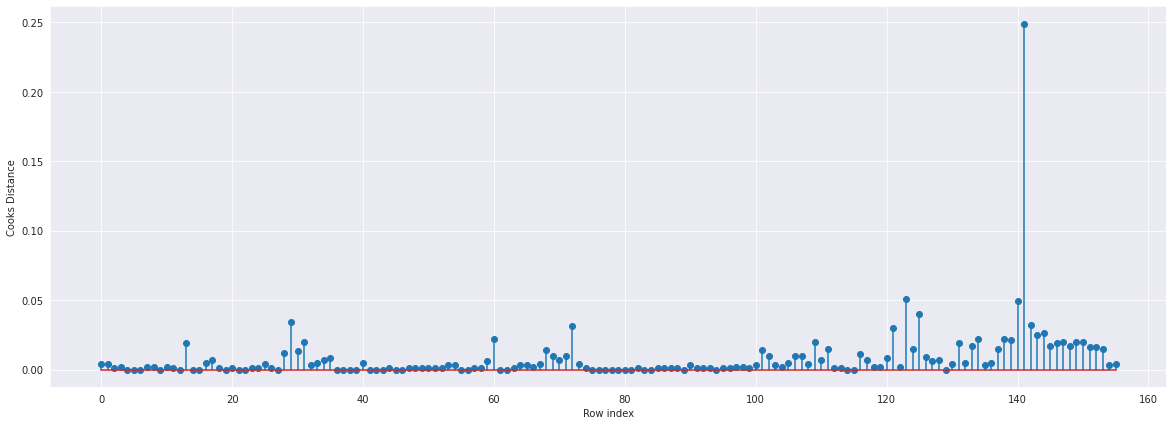

In [60]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(fish1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

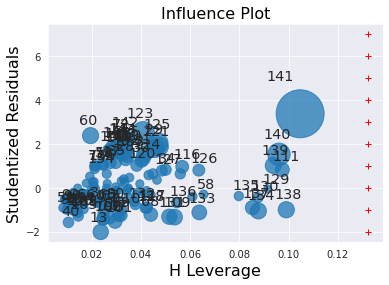

In [61]:
influence_plot(mdl02,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

Here is no data point on the red line or exceeding 0.5 value, So we can use this model for predictions

In [62]:
final_mdl = smf.ols('Weight~Length1+Length3+Height+Width',data = fish1).fit()

In [63]:
(final_mdl.rsquared,final_mdl.aic)

(0.9027497040781141, 1887.426853346827)

Here in mdl02,It has improved  rsquared and aic values.

Predicting for new data

In [64]:
new_data=pd.DataFrame({'Length1':23.9,'Length3':31.1,'Height':12.3,'Width':4.6},index=[1])

In [65]:
final_mdl.predict(new_data)

1    376.507882
dtype: float64

In [66]:
pred = final_mdl.predict(fish1)

#Comparing the actual weight and predicted weight values

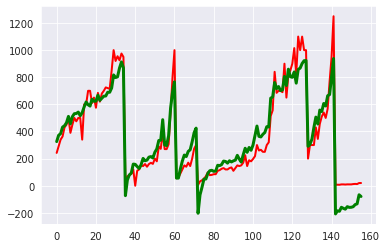

In [67]:
plt.plot(fish1['Weight'],c='red',linewidth = 2)
plt.plot(pred,c='green',linewidth = 3)

Now we will do feature scaling  and and see how the model performs.

In [68]:
fish1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
x = fish1[['Weight','Length1'	,'Length2'	,'Length3'	,'Height'	,'Width']]

In [84]:
x.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [81]:
std = StandardScaler()

In [82]:
fish_std = std.fit_transform(x)

In [85]:
fish_std1 = pd.DataFrame(x, columns = x.columns)

In [73]:
#Standardisation = preprocessing.StandardScaler()

In [89]:
fish_stmd1 = smf.ols('Weight~Length1+Length3+Height+Width',data = fish_std1).fit()

In [90]:
(fish_stmd1.rsquared, fish_stmd1.aic)

(0.9027497040781141, 1887.426853346827)

In [92]:
pred_std = fish_stmd1.predict(x)

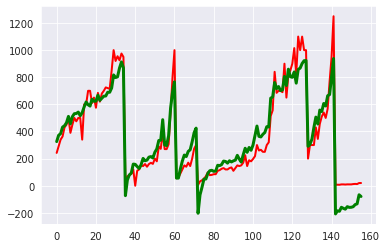

In [93]:
plt.plot(fish1['Weight'],c='red',linewidth = 2)
plt.plot(pred_std,c='green',linewidth = 3)

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
fish_mn = MinMaxScaler()

In [97]:
x_after_min_max_scaler =fish_mn.fit_transform(x)

In [98]:
fish_nml = pd.DataFrame(x, columns =x.columns)

In [99]:
fish_min_max1 = smf.ols('Weight~Length1+Length3+Height+Width',data =fish_nml).fit()

In [100]:
(fish_min_max1.rsquared, fish_min_max1.aic)

(0.9027497040781141, 1887.426853346827)

**Conclusion **- The results are same even after applying both type of feature scaling 
